In [6]:
import numpy as np
import pandas as pd

In [10]:
data=pd.read_csv("2016-mlb-homeruns.csv")

In [11]:
data.head(5)

,play_id,title,ExitVelocity,HitDistance,LaunchAngle,video
0,5b254850-9e14-48d2-8baf-c3e12ecbe68d,John Jaso homers (6) on a fly ball to center f...,102.9,412.0,25.0,https://sporty-clips.mlb.com/YjlLTlpfWGw0TUFRP...
1,0110e760-5d49-4c53-ad29-e74c787c038d,Evan Longoria homers (34) on a fly ball to lef...,103.1,423.0,31.0,https://sporty-clips.mlb.com/OHcxUXlfWGw0TUFRP...
2,3b9ecf94-e3fe-4d79-8b33-efe174dfa53e,Marwin Gonzalez homers (13) on a line drive to...,106.6,390.0,22.0,https://sporty-clips.mlb.com/Mk9vbFBfWGw0TUFRP...
3,bda1cb83-dca9-46b2-aaad-6c1f009cd51c,Eddie Rosario homers (10) on a fly ball to rig...,98.5,368.0,30.0,https://sporty-clips.mlb.com/ajlhWFpfWGw0TUFRP...
4,9f87e907-3c4f-4187-8fb0-d6784b3b1f1a,Marcus Semien homers (26) on a fly ball to lef...,106.0,435.0,32.0,https://sporty-clips.mlb.com/bGUyNEdfWGw0TUFRP...


In [12]:
data.shape

(5499, 6)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499 entries, 0 to 5498
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   play_id       5499 non-null   object 
 1   title         5497 non-null   object 
 2   ExitVelocity  5450 non-null   float64
 3   HitDistance   5494 non-null   float64
 4   LaunchAngle   5450 non-null   float64
 5   video         5499 non-null   object 
dtypes: float64(3), object(3)
memory usage: 257.9+ KB


In [14]:
data.describe()

,ExitVelocity,HitDistance,LaunchAngle
count,5450.000000,5494.000000,5450.000000
mean,103.340477,392.178082,28.034679
std,4.389941,60.665475,5.119716
min,87.100000,0.000000,14.000000
25%,100.500000,381.000000,24.000000
50%,103.400000,400.000000,28.000000
75%,106.400000,417.000000,31.000000
max,117.400000,504.000000,48.000000


In [15]:
data.columns.tolist()

['play_id', 'title', 'ExitVelocity', 'HitDistance', 'LaunchAngle', 'video']

In [16]:
data.isnull().sum()

play_id          0
title            2
ExitVelocity    49
HitDistance      5
LaunchAngle     49
video            0
dtype: int64

In [17]:
# Replace null values with the mean of each column
data['ExitVelocity'] = data['ExitVelocity'].fillna(data['ExitVelocity'].mean())

data['HitDistance'] = data['HitDistance'].fillna(data['HitDistance'].mean())

data['LaunchAngle'] = data['LaunchAngle'].fillna(data['LaunchAngle'].mean())

In [18]:
df_cleaned = data[data['title'].notna() & (data['title'] != '')]

In [19]:
data.isnull().sum()

play_id         0
title           2
ExitVelocity    0
HitDistance     0
LaunchAngle     0
video           0
dtype: int64

In [21]:
print(data['title'].isnull().sum())

print("Empty string values in 'title' before removal:")

print((data['title'] == '').sum())


# Remove rows with null values or empty strings in the 'title' column

df_cleaned = df[df['title'].notna() & (df['title'] != '')]


2
Empty string values in 'title' before removal:
0


In [22]:
data.nunique()

play_id         5037
title           5035
ExitVelocity     262
HitDistance      206
LaunchAngle       35
video           5037
dtype: int64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

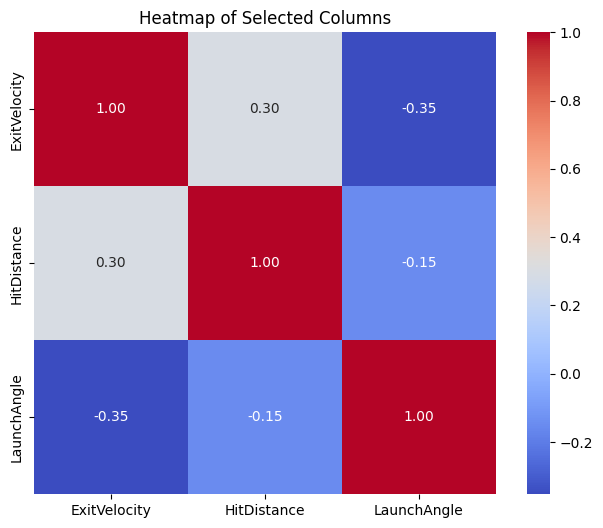

              ExitVelocity  HitDistance  LaunchAngle
ExitVelocity      1.000000     0.296410    -0.353166
HitDistance       0.296410     1.000000    -0.148648
LaunchAngle      -0.353166    -0.148648     1.000000


In [24]:
selected_columns = data[['ExitVelocity','HitDistance','LaunchAngle']]
correlation_matrix = selected_columns.corr()
# Set the size of the plot

plt.figure(figsize=(8, 6))


# Create the heatmap

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)


# Set the title

plt.title('Heatmap of Selected Columns')


# Show the plot

plt.show()
print(selected_columns.corr())

In [39]:
x=data.iloc[:,[2,4]].values
y=data.iloc[:,4].values 

In [40]:
print(x)

[[102.9         25.        ]
 [103.1         31.        ]
 [106.6         22.        ]
 ...
 [103.34047706  28.0346789 ]
 [103.34047706  28.0346789 ]
 [103.34047706  28.0346789 ]]


In [41]:
print(y)

[25.        31.        22.        ... 28.0346789 28.0346789 28.0346789]


In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/8,random_state=0)

In [44]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsRegressor


# Define the model

knn_regressor = KNeighborsRegressor()


# Define the parameter grid

param_grid = {'n_neighbors': range(1, 31)}


# Set up GridSearchCV

grid_search = GridSearchCV(knn_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')


# Fit the model

grid_search.fit(x_train, y_train)


# Get the best parameter

best_n_neighbors = grid_search.best_params_['n_neighbors']

print("Best n_neighbors:", best_n_neighbors)

Best n_neighbors: 1


In [45]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7)  

model.fit(x_train, y_train)


# Make predictions

y_pred = model.predict(x_test)

In [47]:
input1=[[102.9,412.0]]
input1=sc.transform(input1)
result=(model.predict(input1))
print(result)

[45.28571429]


In [48]:
from sklearn.metrics import mean_squared_error,r2_score


mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)

print("R^2 Score:", r2)

Mean Squared Error: 0.011394348473373428
R^2 Score: 0.9995469221149419


In [49]:
import pickle


# Save the model to a file

with open('knn_model.pkl', 'wb') as file:

    pickle.dump(model, file)
print("Model saved as knn_model.pkl")

Model saved as knn_model.pkl
